In [1]:
!pip install pyairtable

In [53]:
import os
import requests
import pandas as pd
from pyairtable import Table
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import math
import seaborn as sns

In [54]:
# uncomment this and add key here ''
api_key = 'keyeblPbztyg9rZkO'

In [55]:
base_id = "apptUkOtU3W8HxbQQ"
table_name = "Organization List"

In [56]:
table = Table(api_key, base_id, table_name)

In [57]:
table

<Table base_id=apptUkOtU3W8HxbQQ table_name=Organization List>

In [58]:
all_data = table.all()
len(all_data)

1215

In [59]:
all_data[0]

{'id': 'rec00MDWnik2I0nA8',
 'fields': {'Web': 'https://softsmile.com/',
  'Original Source': 'TechNYC',
  'Owner': {'id': 'usr9BPdDIhuQuzTkj',
   'email': 'atownsend@cornell.edu',
   'name': 'Anthony Townsend'},
  'Urban Tech Screening': 'Failed',
  'Sniff Test Notes': 'dental software\n',
  'Company': 'SoftSmile'},
 'createdTime': '2022-01-05T20:22:37.000Z'}

In [60]:
df = pd.json_normalize(all_data, sep='_')
df.head()

id               createdTime  \
0  rec00MDWnik2I0nA8  2022-01-05T20:22:37.000Z   
1  rec019MVAabtvqZ29  2022-01-05T20:22:37.000Z   
2  rec020xb3hcLqlI4e  2022-01-05T20:22:37.000Z   
3  rec0C1X6J53tsmZHo  2021-10-26T16:28:52.000Z   
4  rec0CxUiuuPRFVKNw  2022-01-05T20:22:37.000Z   

                       fields_Web fields_Original Source    fields_Owner_id  \
0          https://softsmile.com/                TechNYC  usr9BPdDIhuQuzTkj   
1           https://www.loop.ai/                 TechNYC  usr9BPdDIhuQuzTkj   
2            https://www.yapp.us/                TechNYC  usr9BPdDIhuQuzTkj   
3            https://navigine.com                    NaN  usrzlz6zDGzjGmaEg   
4  https://horizon-ventures.net/                 TechNYC  usr9BPdDIhuQuzTkj   

      fields_Owner_email fields_Owner_name fields_Urban Tech Screening  \
0  atownsend@cornell.edu  Anthony Townsend                      Failed   
1  atownsend@cornell.edu  Anthony Townsend                      Failed   
2  atownsend@cornell.edu  Anthony Townsend                      Failed   
3      mfd64@cornell.edu         Max Dumas                      Passed   
4  atownsend@cornell.edu  Anthony Townsend                      Failed   

                       fields_Sniff Test Notes    fields_Company  \
0                            dental software\n         SoftSmile   
1                  looks like AI consultants\n      Loop AI Labs   
2                                movile apps\n              Yapp   
3  Indoor navigation and way-finding systems\n          Navigine   
4                                          NaN  Horizon Ventures   

   fields_Total Investment  fields_Does it involve government?  \
0                      NaN                                 NaN   
1                      NaN                                 NaN   
2                      NaN                                 NaN   
3                1700000.0                                 1.0   
4                      NaN                                 NaN   

  fields_Number of Employees fields_Sub-category (linked)  fields_Latitude  \
0                        NaN                          NaN              NaN   
1                        NaN                          NaN              NaN   
2                        NaN                          NaN              NaN   
3                         13          [recMljynTYjGtXbYr]        40.753557   
4                        NaN                          NaN              NaN   

                   fields_Business Address fields_Category (linked)  \
0                                      NaN                      NaN   
1                                      NaN                      NaN   
2                                      NaN                      NaN   
3  335 Madison Ave, New York, NY 10017, US      [receyB6jWwnjSbV8a]   
4                                      NaN                      NaN   

  fields_Employees  fields_Year Founded fields_Location  fields_Longitude  \
0              NaN                  NaN             NaN               NaN   
1              NaN                  NaN             NaN               NaN   
2              NaN                  NaN             NaN               NaN   
3            11-50               2011.0       Manhattan        -73.978136   
4              NaN                  NaN             NaN               NaN   

            fields_categorization notes     fields_Category  \
0                                   NaN                 NaN   
1                                   NaN                 NaN   
2                                   NaN                 NaN   
3  indoor navigation tech for buildings  [Mobility Systems]   
4                                   NaN                 NaN   

   fields_How urban is it?                          fields_Sub-category  \
0                      NaN                                          NaN   
1                      NaN                                          NaN   
2                      NaN  

In [61]:
df.columns

Index(['id', 'createdTime', 'fields_Web', 'fields_Original Source',
       'fields_Owner_id', 'fields_Owner_email', 'fields_Owner_name',
       'fields_Urban Tech Screening', 'fields_Sniff Test Notes',
       'fields_Company', 'fields_Total Investment',
       'fields_Does it involve government?', 'fields_Number of Employees',
       'fields_Sub-category (linked)', 'fields_Latitude',
       'fields_Business Address', 'fields_Category (linked)',
       'fields_Employees', 'fields_Year Founded', 'fields_Location',
       'fields_Longitude', 'fields_categorization notes', 'fields_Category',
       'fields_How urban is it?', 'fields_Sub-category', 'fields_Confidence',
       'fields_How big of a scale is it?', 'fields_Metadata Sources + Notes',
       'fields_Year Acquired or Dissolved', 'fields_Valuation at Acquisition',
       'fields_Revenue/Budget', 'fields_Contact Name', 'fields_Position',
       'fields_Keywords', 'fields_Social Media', 'fields_Contact Email'],
      dtype='object')

In [62]:
df_passed = df[df['fields_Urban Tech Screening'] == 'Passed']

In [63]:
def parse_cat(x):
    if type(x) is not list:
        return ''
    st = ''.join(str(e) for e in x)
    return st

In [64]:
df_passed['fields_Category'] = df_passed['fields_Category'].apply(lambda x: parse_cat(x))

<ipython-input-64-9cbccc890947>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_passed['fields_Category'] = df_passed['fields_Category'].apply(lambda x: parse_cat(x))


In [65]:
#df_passed['fields_Category']

In [66]:
df_passed['fields_Sub-category'] = df_passed['fields_Sub-category'].apply(lambda x: parse_cat(x))

<ipython-input-66-c8788080a5f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_passed['fields_Sub-category'] = df_passed['fields_Sub-category'].apply(lambda x: parse_cat(x))


In [67]:
df_passed['fields_Category'].value_counts()

Innovation Systems                   34
Civic Systems                        29
Energy Systems                       26
Mobility Systems                     23
Building Systems                     22
Food Systems                         19
Labor Systems                        17
Information Systems                  16
Construction Systems                 13
Housing Systems                      11
Health Systems                        9
Waste Systems                         7
Logistics Systems                     6
Public Safety Systems                 5
Education Systems                     5
Food SystemsLogistics Systems         1
Logistics SystemsMobility Systems     1
Mobility SystemsFood Systems          1
Mobility SystemsLogistics Systems     1
Natural Systems                       1
Health SystemsLogistics Systems       1
Name: fields_Category, dtype: int64

In [68]:
#df_passed['fields_Sub-category'].value_counts()

In [69]:
df_passed['fields_Business Address']

3                 335 Madison Ave, New York, NY 10017, US
7       121 Avenue of the Americas, 6th Floor, New Yor...
14                 1250 Broadway FL 17 New York, NY 10001
17                       36 Cooper Sq, New York, NY 10003
24                462 Seventh Avenue, New York, NY, 10018
                              ...                        
1184                     230 East 73 Street NY, NY, 10021
1187    25 Broadway, c/o TFA 12th Floor, New York, NY ...
1189                    1115 Broadway, New York, NY 10010
1192           510 5th Ave, 3rd Floor, New York, NY 10036
1200    1177 Avenue of the Americas, 5th Floor • New Y...
Name: fields_Business Address, Length: 248, dtype: object

In [70]:
# def get_coordinates(address):
#     if address != address:
#         return ''
#     elif 'comment' in address:
#         return ''
#     elif '#' in address:
#         address = address.replace("#", "")
#     address = address.replace(' ', '+')
#     response = requests.get('https://maps.googleapis.com/maps/api/geocode/json?address={0}&key={1}'.format(address,google_api_key))
#     resp_json_payload = response.json()
#     return dict(resp_json_payload['results'][0]['geometry']['location'])

In [71]:
# DO NOT NEED TO RUN THIS AGAIN
# df_passed['Coords'] = df_passed['fields_Business Address'].apply(lambda x: get_coordinates(x))

In [72]:
# df_passed['Coords']

In [73]:
# df_passed['fields_Business Address']

In [74]:
# df_passed['Latitude'] = df_passed['Coords'].apply(lambda x: None if x == '' else x['lat'])
# df_passed['Longitude'] = df_passed['Coords'].apply(lambda x: None if x == '' else x['lng'])

In [75]:
#df_lat_long = df_passed[['Latitude', 'Longitude', 'fields_Company']]

In [76]:
# Read in NYC shapefile and check shape
nyc = gpd.read_file('modzcta_shp/geo_export_682e39f4-a884-431b-91b2-5927fe09ccd4.shp')
nyc.shape

(178, 5)

In [77]:
geometry = [Point(xy) for xy in zip(df_passed['fields_Longitude'], df_passed['fields_Latitude'])]
geo_df_passed = gpd.GeoDataFrame(df_passed, crs=nyc.crs, geometry=geometry)

In [78]:
geo_df_passed['geometry']

3       POINT (-73.97814 40.75356)
7       POINT (-74.00527 40.72410)
14      POINT (-73.98788 40.74769)
17      POINT (-73.99159 40.72833)
24      POINT (-73.99040 40.75202)
                   ...            
1184    POINT (-73.95870 40.76959)
1187    POINT (-74.01389 40.70555)
1189    POINT (-73.98930 40.74289)
1192    POINT (-73.98085 40.75410)
1200    POINT (-73.98287 40.75728)
Name: geometry, Length: 248, dtype: geometry

In [79]:
# # Spatial join 
# nyc_join = gpd.sjoin(geo_df_passed, nyc, how='inner', predicate='intersects')

In [80]:
geo_df_passed['fields_Category']

3           Mobility Systems
7              Civic Systems
14         Education Systems
17          Building Systems
24          Mobility Systems
                ...         
1184           Waste Systems
1187       Education Systems
1189    Construction Systems
1192        Building Systems
1200           Labor Systems
Name: fields_Category, Length: 248, dtype: object

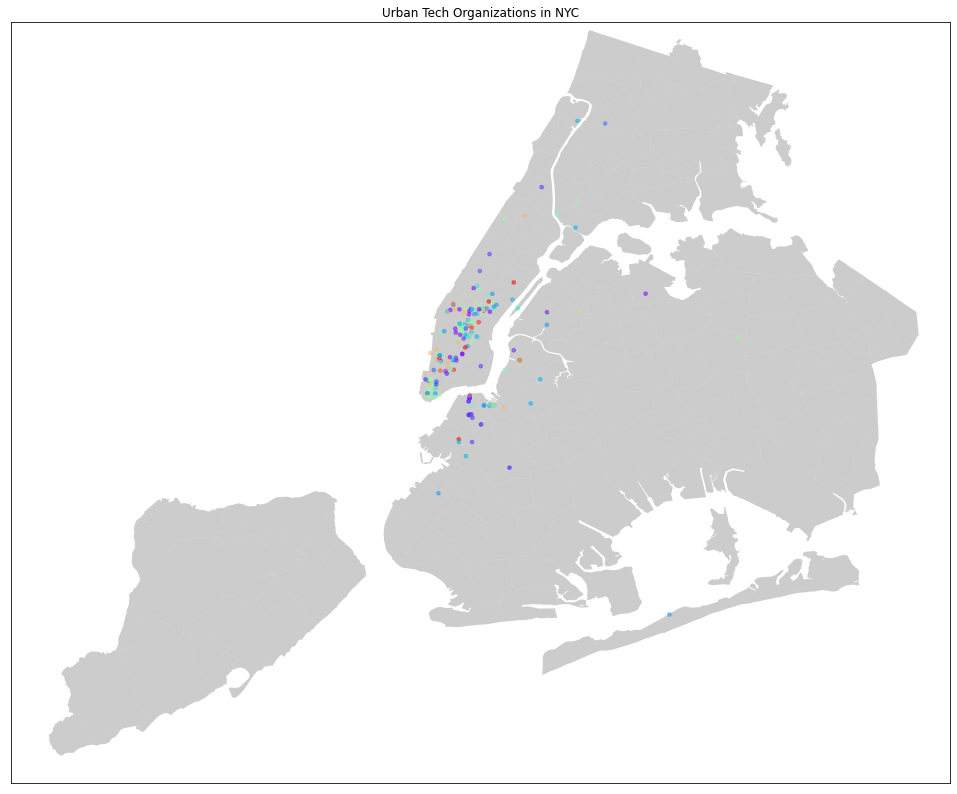

In [81]:
# plot the polygon
base = nyc.plot(color='gray', alpha=0.4, figsize=(20,14))

# plot the marker
#geo_df_passed['geometry'].plot(ax=base, marker='o', alpha=0.7, markersize=7)
geo_df_passed.plot(ax=base, marker='o', alpha=0.5, markersize=13, column='fields_Category', cmap='rainbow')

#legend=True,
#legend_kwds={'loc': 'upper left'}

plt.title('Urban Tech Organizations in NYC')

base.set_xlim(-74.28, -73.68)
base.set_ylim(40.48, 40.92)

base.axes.xaxis.set_visible(False)
base.axes.yaxis.set_visible(False)

In [82]:
# Write Lat/Long to Airtable
# DO NOT RUN THIS AGAIN
# for i in range(df_passed.shape[0]):
#     if pd.isnull(df_passed.iloc[i]['Latitude']) == False:
#         i_d = df_passed.iloc[i]['id']
#         fields = {"Latitude": df_passed.iloc[i]['Latitude'], "Longitude": df_passed.iloc[i]['Longitude']}
#         table.update(i_d, fields)

### PLOTS

In [83]:
df_passed.columns

Index(['id', 'createdTime', 'fields_Web', 'fields_Original Source',
       'fields_Owner_id', 'fields_Owner_email', 'fields_Owner_name',
       'fields_Urban Tech Screening', 'fields_Sniff Test Notes',
       'fields_Company', 'fields_Total Investment',
       'fields_Does it involve government?', 'fields_Number of Employees',
       'fields_Sub-category (linked)', 'fields_Latitude',
       'fields_Business Address', 'fields_Category (linked)',
       'fields_Employees', 'fields_Year Founded', 'fields_Location',
       'fields_Longitude', 'fields_categorization notes', 'fields_Category',
       'fields_How urban is it?', 'fields_Sub-category', 'fields_Confidence',
       'fields_How big of a scale is it?', 'fields_Metadata Sources + Notes',
       'fields_Year Acquired or Dissolved', 'fields_Valuation at Acquisition',
       'fields_Revenue/Budget', 'fields_Contact Name', 'fields_Position',
       'fields_Keywords', 'fields_Social Media', 'fields_Contact Email',
       'geometry'],
   

In [84]:
category_counts = df_passed['fields_Category'].value_counts()

In [85]:
category_counts

Innovation Systems                   34
Civic Systems                        29
Energy Systems                       26
Mobility Systems                     23
Building Systems                     22
Food Systems                         19
Labor Systems                        17
Information Systems                  16
Construction Systems                 13
Housing Systems                      11
Health Systems                        9
Waste Systems                         7
Logistics Systems                     6
Public Safety Systems                 5
Education Systems                     5
Food SystemsLogistics Systems         1
Logistics SystemsMobility Systems     1
Mobility SystemsFood Systems          1
Mobility SystemsLogistics Systems     1
Natural Systems                       1
Health SystemsLogistics Systems       1
Name: fields_Category, dtype: int64

Text(0.5, 1.0, 'Enterprises by Category')

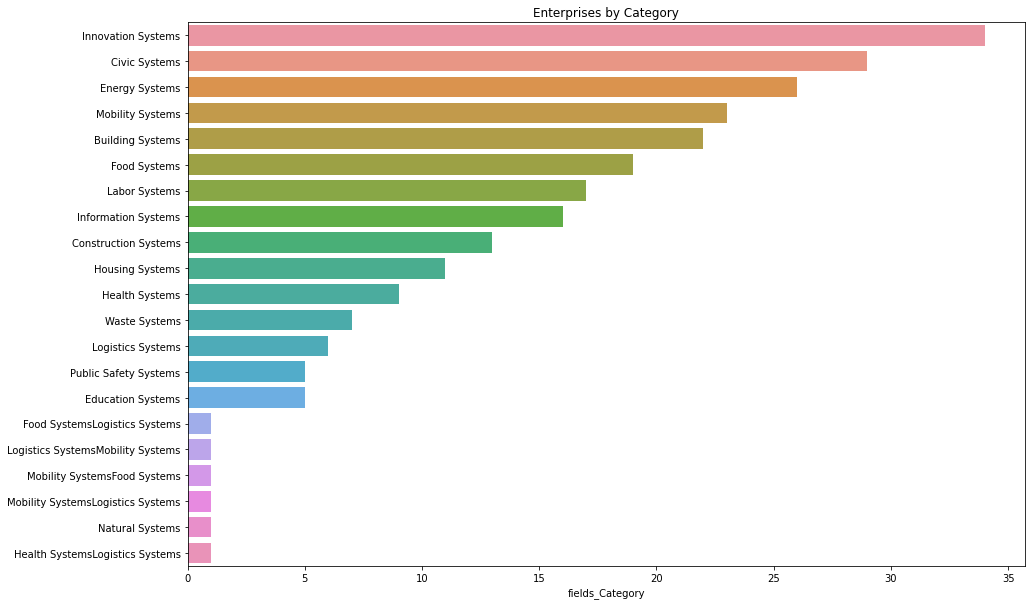

In [86]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(y=category_counts.index, x=category_counts)
plt.title('Enterprises by Category')

In [87]:
category_counts_agg = category_counts.nlargest(5)
category_counts_agg['Everything Else'] = category_counts.sum() - category_counts_agg.sum()

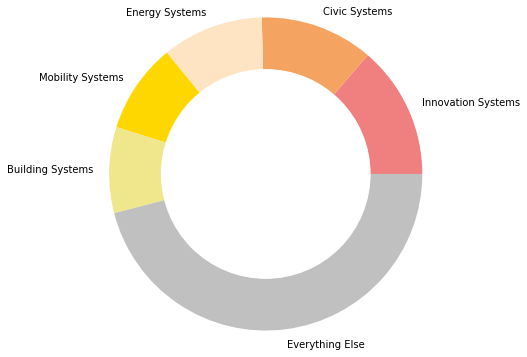

In [88]:
fig = plt.plot(figsize=(15,10))
plt.pie(category_counts_agg, labels=category_counts_agg.index, radius=1.8, 
        colors=['lightcoral','sandybrown','bisque','gold', 'khaki', 'silver'])
my_circle=plt.Circle( (0,0), 1.2, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
#plt.title('The Top 5 Clusters')

In [89]:
df_passed_sub_cat = df_passed[['fields_Company', 'fields_Category', 'fields_Sub-category']]

In [90]:
grouped = df_passed_sub_cat.groupby(by=['fields_Category', 'fields_Sub-category'], as_index=False).count()

In [91]:
grouped

fields_Category                                fields_Sub-category  \
0        Building Systems            Building Systems: Facilities Management   
1        Building Systems  Building Systems: Infrastructure & Asset Manag...   
2        Building Systems              Building Systems: Property Management   
3           Civic Systems              Civic Systems: Data + Media Platforms   
4           Civic Systems                      Civic Systems: Digital Rights   
..                    ...                                                ...   
61        Natural Systems                                                      
62  Public Safety Systems                  Public Safety: Emergency Response   
63  Public Safety Systems                          Public Safety: Monitoring   
64          Waste Systems                           Waste Systems: Diversion   
65          Waste Systems                 Waste Systems: Sanitation Services   

    fields_Company  
0                9  
1                4  
2                9  
3                4  
4                3  
..             ...  
61               1  
62               2  
63               3  
64               5  
65               2  

[66 rows x 3 columns]

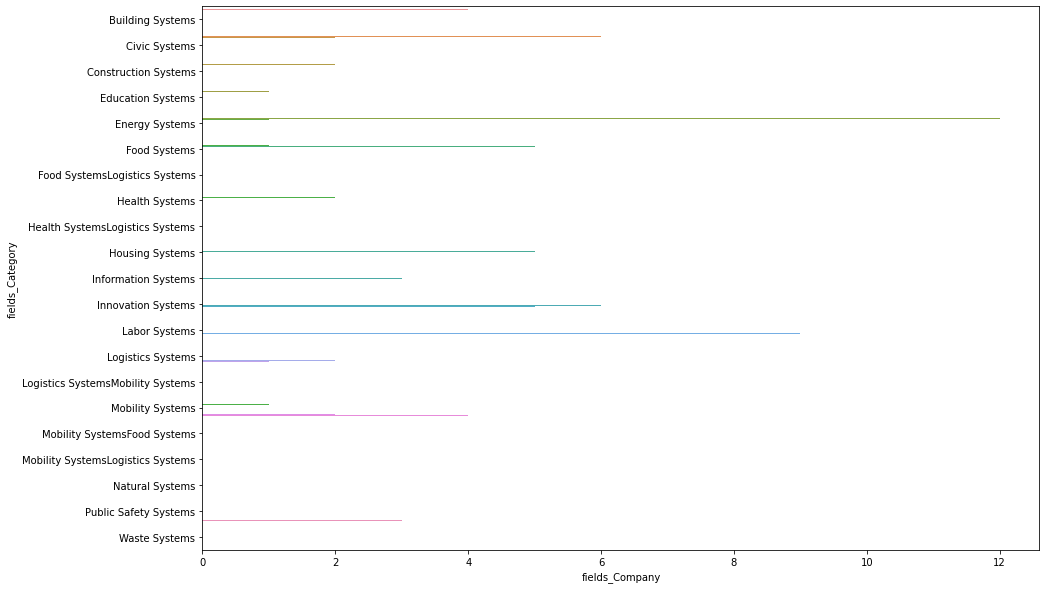

In [92]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(y=grouped['fields_Category'], x=grouped['fields_Company'], hue=grouped['fields_Sub-category'])
plt.legend([],[], frameon=False)

# ref: https://stackoverflow.com/questions/61102266/stacked-bars-with-hue-in-seaborn-and-pandas

In [122]:
df_passed['fields_Year Founded']= df_passed['fields_Year Founded'].astype(str).map(lambda x: x[:4])

df_passed['fields_Year Founded'].head()

<ipython-input-122-0d2c229dd3fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_passed['fields_Year Founded']= df_passed['fields_Year Founded'].astype(str).map(lambda x: x[:4])


3     2011
7     2008
14    2011
17    2012
24    1997
Name: fields_Year Founded, dtype: object

In [94]:
#df_passed['fields_Year Founded'] = df_passed['fields_Year Founded']
pd.set_option('display.max_columns', None)
df_passed.sample(7)

id               createdTime  \
255   recCALC14LfzZqBT5  2021-11-02T17:52:45.000Z   
1148  recw8y0qwqayRTAic  2021-11-02T18:15:41.000Z   
717   recZLRbp7IIklWbfy  2022-01-07T15:45:54.000Z   
30    rec1ZPg6n1MP5aoRx  2021-10-11T13:48:46.000Z   
534   recQbRuy04cNJJ5Wr  2021-10-19T19:54:38.000Z   
551   recREE66FOlTWyVWt  2021-10-26T20:40:37.000Z   
912   reciqDeEZPLymkBZk  2021-10-26T19:43:16.000Z   

                              fields_Web fields_Original Source  \
255             https://grouphugtech.com                NYC EDC   
1148            https://www.envairo.com/                    NaN   
717   https://seabenergy.com/about-seab/                    NaN   
30                 https://agtech-x.com/                NYC EDC   
534                       www.wear.works                    NaN   
551                 https://pillar.tech/                    NaN   
912            https://www.citymart.com/                NYC EDC   

        fields_Owner_id     fields_Owner_email fields_Owner_name  \
255   usrCxpuT0RoHLuwkR      ek542@cornell.edu      Eesha Khanna   
1148  usrCxpuT0RoHLuwkR      ek542@cornell.edu      Eesha Khanna   
717   usr9BPdDIhuQuzTkj  atownsend@cornell.edu  Anthony Townsend   
30    usruYurWuYKJoW6LE     jjl295@cornell.edu         Jenny Liu   
534   usrzlz6zDGzjGmaEg      mfd64@cornell.edu         Max Dumas   
551   usrCxpuT0RoHLuwkR      ek542@cornell.edu      Eesha Khanna   
912   usr9BPdDIhuQuzTkj  atownsend@cornell.edu  Anthony Townsend   

     fields_Urban Tech Screening  \
255                       Passed   
1148                      Passed   
717                       Passed   
30                        Passed   
534                       Passed   
551                       Passed   
912                       Passed   

                                fields_Sniff Test Notes       fields_Company  \
255   We make ridiculously good looking solar panels...             Grouphug   
1148  Envairo is a software platform that quantifies...              Envairo   
717        anaerobic digesters, N Am office is in NYC\n          SEAB Energy   
30    Acquired by Agritecture LLC (looks to be Toron...          Agritecture   
534   Company producing wristbands that provide navi...            WearWorks   
551   Device that measures environmental metrics in ...  Pillar Technologies   
912   Citymart is a leader in city procurement innov...             Citymart   

      fields_Total Investment  fields_Does it involve government?  \
255                       NaN                                 1.0   
1148               60000000.0                                 1.0   
717                 2877000.0                                 NaN   
30                        NaN                                 1.0   
534                  160000.0                                 1.0   
551                 3400000.0                                 1.0   
912                 1800000.0                                 3.0   

     fields_Number of Employees fields_Sub-category (linked)  fields_Latitude  \
255                           1          [recDZbMMMp5QJXXpQ]        40.647705   
1148                          5          [recxoYfGUZEqppDaZ]        40.724679   
717                          12          [recDZbMMMp5QJXXpQ]        40.755558   
30                          NaN          [rec7zrOknjV6JR9yL]        40.713620   
534                         NaN          [recMljynTYjGtXbYr]        40.724679   
551                           3          [rec1HjG8ErJDBzk43]        40.753657   
912                           6          [recUwmBtQkN1prgeh]        40.700874   

                                fields_Business Address  \
255   517 45th St, 3rd FL Brooklyn, NY, 11220-1306 U...   
1148              29 Norman Ave, Brooklyn, NY 11222, US   
717   800 Third Avenue, Suite 2800, New York, NY, 10022   
30        40 Bushwick Ave, Brooklyn, New York 11211, US   
534               29 Norman Ave, New York, NY 11222, US   
551             335 Madison 

In [105]:
### Ecosystem Overview Tab
employee_counts = df_passed['fields_Employees'].value_counts()
year_founded_counts = df_passed['fields_Year Founded'].value_counts()
investment_counts = df_passed['fields_Total Investment'].value_counts()

In [106]:
year_founded_counts

2016    33
2015    30
2017    28
2014    26
2009    18
2013    16
2012    15
2018    14
2011     9
2008     8
2019     6
2010     5
2007     4
2004     4
2005     3
2021     3
2003     3
1997     2
1995     2
2006     2
1985     2
1966     1
nan      1
1859     1
2020     1
1989     1
2000     1
1996     1
1977     1
1888     1
1999     1
1998     1
1975     1
1978     1
1976     1
2002     1
Name: fields_Year Founded, dtype: int64

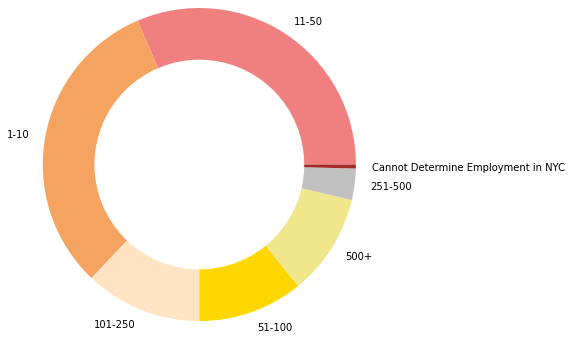

In [97]:
fig = plt.plot(figsize=(15,10))
plt.pie(employee_counts, labels=employee_counts.index, radius=1.8, 
        colors=['lightcoral','sandybrown','bisque','gold', 'khaki', 'silver', 'brown'])
my_circle=plt.Circle( (0,0), 1.2, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
#plt.title('Employee Ranges in NYCs Tech Ecosystem' )

In [125]:
df_passed_employees = df_passed[['fields_Company', 'fields_Employees']]

grouped_emp = df_passed_employees.groupby(by=['fields_Employees'], as_index=False).count()
grouped_emp.rename(columns={'fields_Employees':'Employee Range', 'fields_Company': 'Number of Enterprises'})

Employee Range  Number of Enterprises
0                                1-10                     78
1                             101-250                     30
2                               11-50                     78
3                             251-500                      8
4                                500+                     26
5                              51-100                     27
6  Cannot Determine Employment in NYC                      1

Text(0.5, 1.0, 'Enterprise Formation Year')

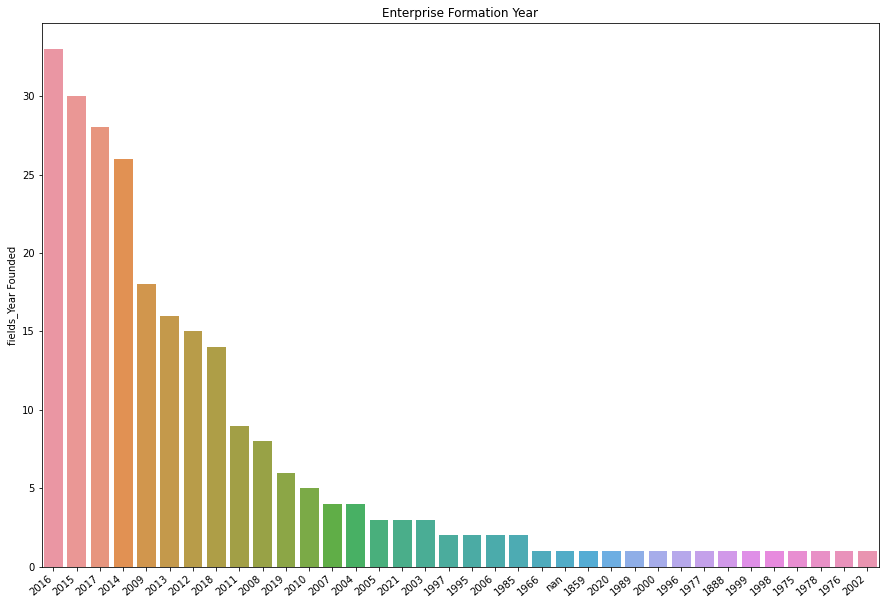

In [100]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(y=year_founded_counts, x=year_founded_counts.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#plt.tight_layout()
plt.title('Enterprise Formation Year')

In [126]:
df_passed_year = df_passed[['fields_Company', 'fields_Year Founded']]

grouped_year = df_passed_year.groupby(by=['fields_Year Founded'], as_index=False).count()
grouped_year.rename(columns={'fields_Year Founded':'Year Founded', 'fields_Company': 'Number of Enterprises'}).sort_values(by=['Year Founded'], ascending=False)



Year Founded  Number of Enterprises
35          nan                      1
34         2021                      3
33         2020                      1
32         2019                      6
31         2018                     14
30         2017                     28
29         2016                     33
28         2015                     30
27         2014                     26
26         2013                     16
25         2012                     15
24         2011                      9
23         2010                      5
22         2009                     18
21         2008                      8
20         2007                      4
19         2006                      2
18         2005                      3
17         2004                      4
16         2003                      3
15         2002                      1
14         2000                      1
13         1999                      1
12         1998                      1
11         1997                      2
10         1996                      1
9          1995                      2
8          1989                      1
7          1985                      2
6          1978                      1
5          1977                      1
4          1976                      1
3          1975                      1
2          1966                      1
1          1888                      1
0          1859                      1

Text(0.5, 1.0, 'Total Investment in Enterprises')

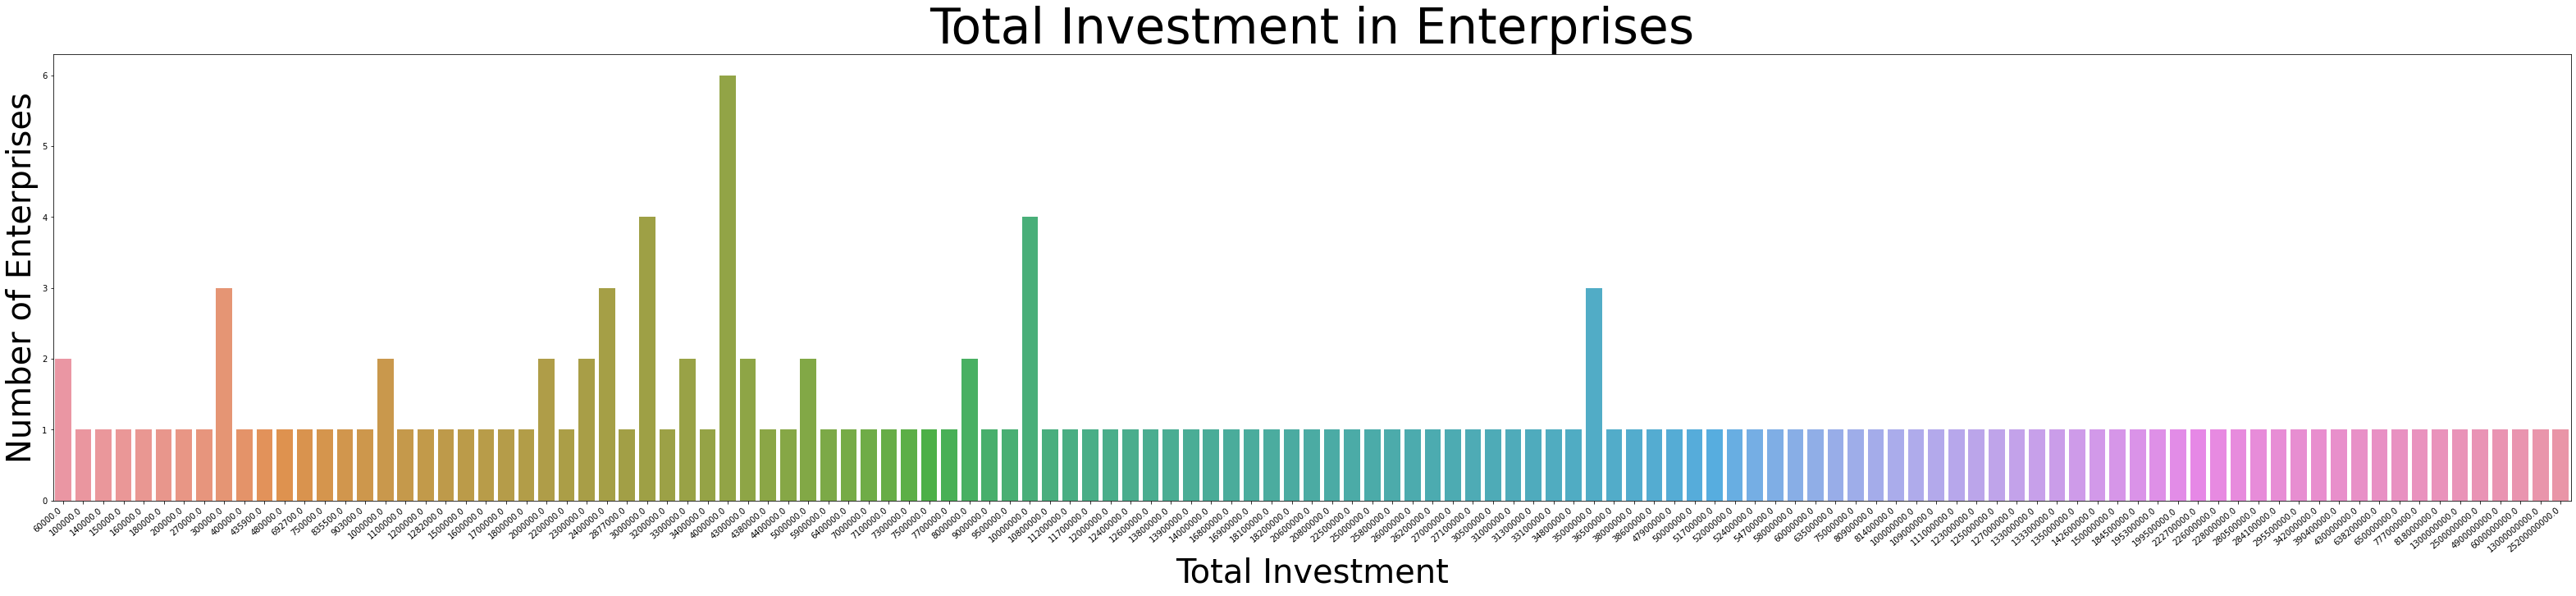

In [120]:
fig, ax = plt.subplots(figsize=(55,10))
p = sns.barplot(y=investment_counts, x=investment_counts.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=10)
#plt.tight_layout()
p.set_xlabel("Total Investment", fontsize = 40)
p.set_ylabel("Number of Enterprises", fontsize = 40)
p.set_title("Total Investment in Enterprises", fontsize = 60)


In [142]:
from decimal import Decimal

df_passed_investment = df_passed[['fields_Company', 'fields_Total Investment']]

grouped_investment = df_passed_investment.groupby(by=['fields_Total Investment'], as_index=False).count()
grouped_investment = grouped_investment.rename(columns={'fields_Total Investment':'Total Investment', 'fields_Company': 'Number of Enterprises'})
grouped_investment['Total Investment'] = grouped_investment['Total Investment'].astype(float)

grouped_investment



Total Investment  Number of Enterprises
0        6.000000e+04                      2
1        1.000000e+05                      1
2        1.400000e+05                      1
3        1.500000e+05                      1
4        1.600000e+05                      1
..                ...                    ...
120      2.500000e+09                      1
121      4.900000e+09                      1
122      6.000000e+09                      1
123      1.300000e+10                      1
124      2.520000e+10                      1

[125 rows x 2 columns]